In [1]:
%matplotlib inline

# APSG tutorial - structural geology module for Python - Part 5

In [2]:
from apsg import *
apsg_conf['figsize'] = (9, 7)

## Cluster class
``Cluster`` class provide access to **scipy** hierarchical clustering. Distance matrix is calculated as mutual angles of features within Group keeping axial and/or vectorial nature in mind. ``Cluster.explain`` method allows to explore explained variance versus number of clusters relation. Actual cluster is done by ``Cluster.cluster`` method, using distance or maxclust criterion. Using of ``Cluster`` is explained in following example. We generate some data and plot dendrogram

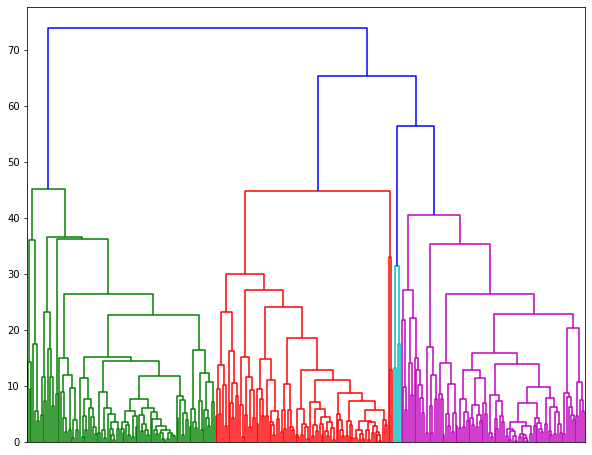

In [77]:
g1 = Group.randn_lin(mean=Lin(45,30))
g2 = Group.randn_lin(mean=Lin(320,56))
g3 = Group.randn_lin(mean=Lin(150,40))
g = g1 + g2 + g3
cl = Cluster(g)
cl.dendrogram(no_labels=True)

Now we can explore evolution of within-groups variance versus number of clusters on Elbow plot (Note change in slope for three clusters)

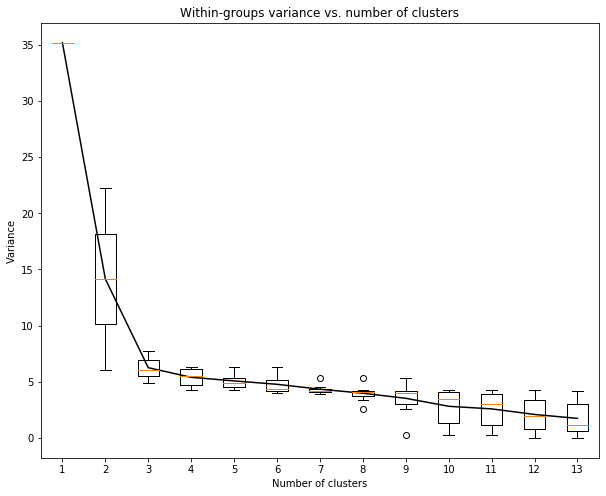

In [78]:
cl.elbow()

Finally we can do clustering and plot created clusters

In [79]:
cl.cluster(maxclust=3)
cl.R.data  # Restored centres of clusters

[L:148/42, L:317/55, L:45/26]

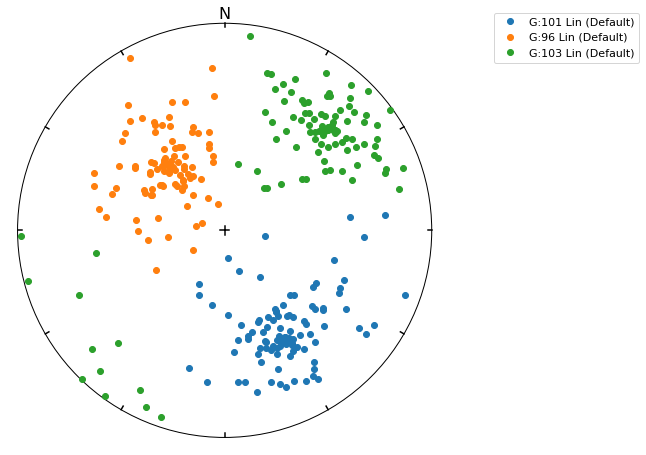

In [80]:
StereoNet(*cl.groups);

## Some tricks

Double cross products are allowed but not easy to understand.

For example ``p**l**p`` is interpreted as ``p**(l**p)``: a) ``l**p`` is plane defined by ``l`` and ``p`` normal b) intersection of this plane and ``p`` is calculated

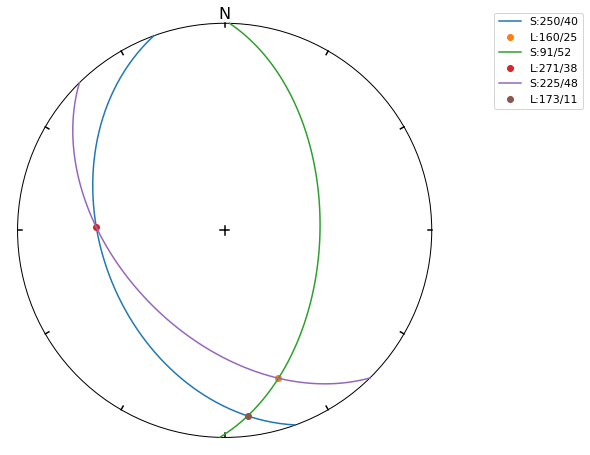

In [81]:
p = Fol(250,40)
l = Lin(160,25)
StereoNet(p, l, l**p, p**l, l**p**l, p**l**p);

``Pair`` class could be used to correct measurements of planar linear features which should spatialy overlap

In [82]:
pl = Pair(250, 40, 160, 25)
pl.misfit

18.889520432245405

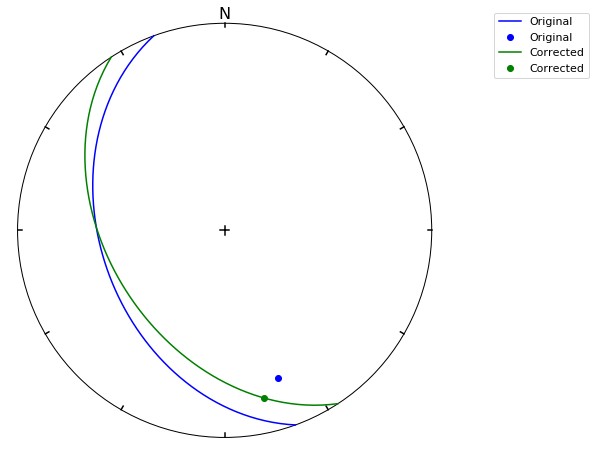

In [83]:
s = StereoNet()
s.plane(Fol(250, 40), 'b', label='Original')
s.line(Lin(160, 25), 'bo', label='Original')
s.plane(pl.fol, 'g', label='Corrected')
s.line(pl.lin, 'go', label='Corrected')
s.show()

``StereoNet`` has method ``arrow`` to draw arrow. Here is example of Hoeppner plot for variable fault orientation within given stress field

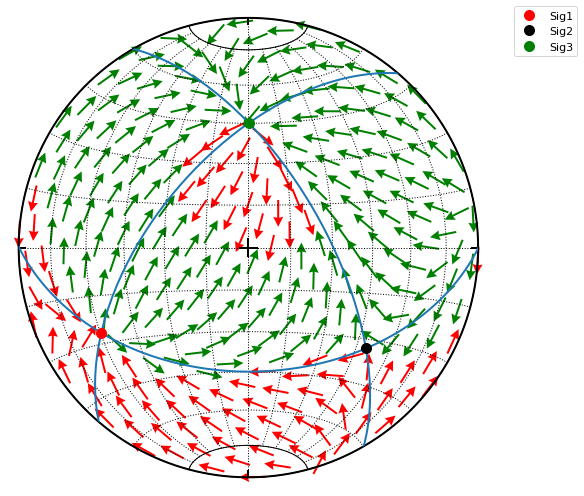

In [8]:
R = defgrad.from_pair(pair(180, 45, 240, 27))
S = stress([[-8, 0, 0],[0, -5, 0],[0, 0, -1]]).transform(R)
d = vec3set.uniform_gss(n=600)
d = d[~d.is_upper()]
s = StereoNet()
s.great_circle(*S.eigenfols, lw=2)
s.line(S.eigenlins[0], ms=10, color='red', label='Sig1')
s.line(S.eigenlins[1], ms=10, color='k', label='Sig2')
s.line(S.eigenlins[2], ms=10, color='green', label='Sig3')
for n in d:
    f = S.fault(n)
    if f.sense == 1:
        s.arrow(f.fvec, f.lvec, f.sense, color='red')
    else:
        s.arrow(f.fvec, f.lvec, f.sense, color='green')
s.show()